In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import re

params = {'font.family': 'Arial','font.weight':'normal'} #set the basic parameters for figure
plt.rcParams["figure.dpi"] = 300
matplotlib.rcParams.update(params)

In [2]:
readdata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/File/"
savedata_dir = "D:/Develop/Compensatory-Evolution/CodeForGithub/FigureS2/"

In [8]:
#read the rescuability data with different cut-off metric
#make a function to return the data of each different threshold 
range_seg_dict = {1:[106,135],2:[136,163],3:[145,170],4:[171,200],5:[181,211],6:[96,125],7:[66,95],8:[56,85],10:[30,47],
                 11:[13,29],12:[6,24]}
def return_single_position_rescuality_site(fitness_cutoff, total_N):
    
    for segN in [1,2,3,4,5,6,7,8,10,11,12]:
        seg_data = pd.read_csv(readdata_dir + "RescuabilityFile/rescuability_seg%d.tsv"%segN,sep="\t")
        seg_data = seg_data[(seg_data["s"] <= fitness_cutoff) & (seg_data["#genotypesWithAddiSubs"] >= total_N)]
        globals()["seg%d_data"%segN] = seg_data
    
    site_list = []
    res_sum = []
    count_N = []
    res_mean = []
    res_sd = []

    for site in range(6,212):
        for key in range_seg_dict.keys():
            if (site<=range_seg_dict[key][1]) & (site>=range_seg_dict[key][0]):
                All_data = globals()["seg%d_data"%key]
                All_data_rows = All_data.shape[0]
                ## cycle this segment
                res = 0
                count = 0
                res_single_row_list = []
                for row in range(All_data_rows):
                    mutation_site = [int(i) for i in re.findall('(\d+)',All_data["mut_list_Scer"].values[row])]
                    if site in mutation_site:
                        res += All_data["rescuability"].values[row]
                        res_single_row_list.append(All_data["rescuability"].values[row])
                        count += 1
                site_list.append(site)
                res_sum.append(res)
                count_N.append(count)
                if count > 0:
                    res_mean.append(res/count)
                    res_sd.append(np.std(res_single_row_list))
                
                else:
                    res_mean.append(0)
                    res_sd.append(np.std(res_single_row_list))
        
        
    #load the modify each site data
    data_f_inner = pd.DataFrame({"site":site_list,"res_sum":res_sum,"count":count_N,"res_mean":res_mean,"res_std":res_sd})
    #data_f.to_csv(data_dir + "each_site.csv",sep=",",index=False)
    each_site_data_inner = data_f_inner
    each_site_data_dropcountzero_inner = each_site_data_inner[each_site_data_inner["count"]>0]
    return each_site_data_dropcountzero_inner,fitness_cutoff,total_N


In [40]:
make_color_map = {"Instability ":"grey",
                 "Helix":"firebrick",
                 "Strand":"royalblue"}

def plot_single_res(dataframe_input,fitness_cutoff,total_N):
    plt.figure(figsize=(3.0,2.5))
    ax = plt.subplot(111)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    for row in range(dataframe_input.shape[0]):
        single_site = dataframe_input.iloc[row,:]["site"]
        if structure_position_dict[single_site] == 'Instability ':
            p1 = plt.errorbar(single_site,dataframe_input["res_mean"].values[row],\
            yerr=dataframe_input["res_std"].values[row],\
            fmt=".",ecolor='coral',elinewidth=1.0,capsize=0,ms=1,color="coral",label="loop")
        if structure_position_dict[single_site] == 'Helix':
            p2 = plt.errorbar(single_site,dataframe_input["res_mean"].values[row],\
            yerr=dataframe_input["res_std"].values[row],\
            fmt=".",ecolor='steelblue',elinewidth=1.0,capsize=0,ms=1,color="steelblue",label="α-helix")    
        if structure_position_dict[single_site] == 'Strand':
            p3 = plt.errorbar(single_site,dataframe_input["res_mean"].values[row],\
            yerr=dataframe_input["res_std"].values[row],\
            fmt=".",ecolor='forestgreen',elinewidth=1.0,capsize=0,ms=1,color="forestgreen",label="β-trand")
    legend  = plt.legend([p1, p2,p3], ['loop ', 'α-helix','β-trand'],loc='upper right', scatterpoints=1,edgecolor='black',fontsize=10,
          )    
    legend = legend.get_frame().set_linewidth(0.5)
    plt.xticks(fontsize = 12)

    plt.yticks(fontsize = 12)
    plt.ylabel("Average rescuability",fontsize=14)
    plt.xlabel("Position along His3p",fontsize = 14)


    #modify the lindwidth of the lines 
    for axis in ['bottom','left']:
        ax.spines[axis].set_linewidth(0.5)

    ax = plt.gca()
    ax.tick_params(width=0.5)
    #the length of the ticks
    ax.tick_params( axis='both',length=3)
    #save figure
    plt.xlim([-1,230])
    plt.tight_layout()
    #save the figure
    plt.savefig(savedata_dir + "unfit%dall%d.png"%(fitness_cutoff*10,total_N),dpi = 300)
    plt.show()


In [31]:
#load secondary structure data information
ss_infoData = pd.read_csv(readdata_dir + "RSAWCNConservationInterfaceFile/His3_disordered_region.csv",sep = ",")
structure_position_dict = {}
helix_symbol = ["H","I","G"]
strand_symbol = ["E","B"]

for row in range(ss_infoData.shape[0]):
    position_site = ss_infoData["position"].values[row]
    structure_single = ss_infoData["structure"].values[row]
    if structure_single in helix_symbol:
        structure_position_dict[position_site] = "Helix"
    elif structure_single in strand_symbol:
        structure_position_dict[position_site] = "Strand"
    else:
        structure_position_dict[position_site] = "Instability "

C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


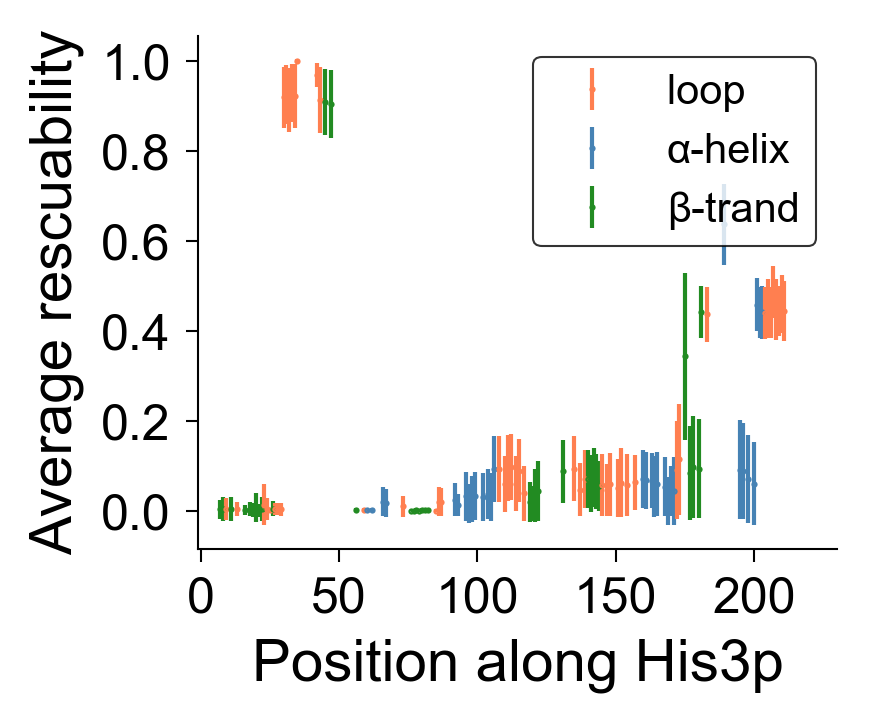

C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


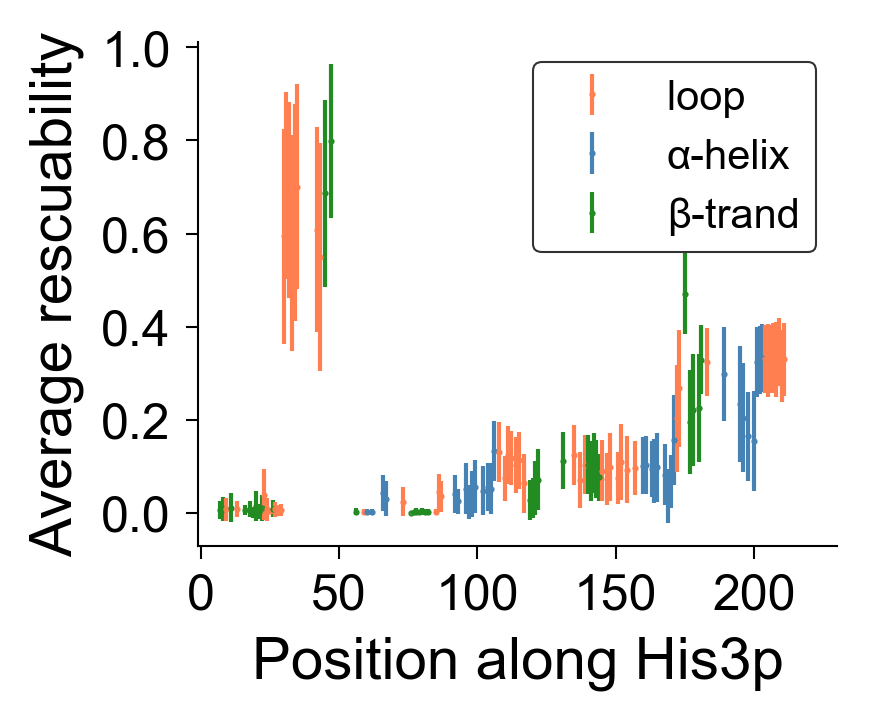

In [41]:
#All_N > 0 & Unfit genotypes with fitness == 0
each_site_data_dropcountzero_unfit00_alln0,fitness_cutoff,All_n_cut_off = return_single_position_rescuality_site(0,0)
plot_single_res(each_site_data_dropcountzero_unfit00_alln0,fitness_cutoff,All_n_cut_off)
#All_N > 10 & Unfit genotypes with fitness < 0.5
each_site_data_dropcountzero_unfit00_alln0,fitness_cutoff,All_n_cut_off = return_single_position_rescuality_site(0.5,10)
plot_single_res(each_site_data_dropcountzero_unfit00_alln0,fitness_cutoff,All_n_cut_off)

In [46]:
#load WT, and set them to wild type
wild_type_fitness_dict ={1: ['EALGAVRGVKRFGSGFAPLDEALSRAVVDL', 1.0194867989799998],
 2: ['SNRPYAVVELGLQREKVGDLSCEMIPHF', 1.06693768983],
 3: ['LGLQREKVGDLSCEMIPHFLESFAEA', 0.9674367218100001],
 4: ['SRITLHVDCLRGKNDHHRSESAFKALAVAI', 1.01228285398],
 5: ['RGKNDHHRSESAFKALAVAIREATSPNGTND', 0.9686273495479999],
 6: ['CGIALGQAFKEALGAVRGVKRFGSGFAPLD', 1.04126457178],
 7: ['IHALAKHSGWSLIVECIGDLHIDDHHTTED', 0.991815606454],
 8: ['HTGIGFLDHMIHALAKHSGWSLIVECIGDL', 1.01449980982],
 9: ['PEKEAEAVAEQATQSQVINV', 1.03039759575],
 10: ['IEHSIFPEKEAEAVAEQA', 1.01743828761],
 11: ['NETKIQIAISLKGGPLA', 1.01306961593],
 12: ['ALVKRITNETKIQIAISLK', 1.03634032726]}

def return_single_position_rescuality_site_small_wt(All_n_cut_off):
    for segN in [1,2,3,4,5,6,7,8,10,11,12]:
        seg_data = pd.read_csv(readdata_dir + "RescuabilityFile/rescuability_seg%d.tsv"%segN,sep="\t")
        seg_data = seg_data[(seg_data["s"] < wild_type_fitness_dict[segN][1]) & (seg_data["#genotypesWithAddiSubs"]>=All_n_cut_off)]
        globals()["seg%d_data"%segN] = seg_data
    
    site_list_inner = []
    res_sum_inner = []
    count_N_inner = []
    res_mean_inner = []
    res_sd_inner = []

    for site in range(6,212):
        for key in range_seg_dict.keys():
            if (site<=range_seg_dict[key][1]) & (site>=range_seg_dict[key][0]):
                All_data = globals()["seg%d_data"%key]
                All_data_rows = All_data.shape[0]
                ## cycle this segment
                res = 0
                count = 0
                res_single_row_list = []
                for row in range(All_data_rows):           
                    mutation_site = [int(i) for i in re.findall('(\d+)',All_data["mut_list_Scer"].values[row])]                 
                    if site in mutation_site:
                        res += All_data["rescuability"].values[row]
                        res_single_row_list.append(All_data["rescuability"].values[row])
                        count += 1
                site_list_inner.append(site)
                res_sum_inner.append(res)
                count_N_inner.append(count)
                if count > 0:
                    res_mean_inner.append(res/count)
                    res_sd_inner.append(np.std(res_single_row_list))
                
                else:
                    res_mean_inner.append(0)
                    res_sd_inner.append(np.std(res_single_row_list))
        
        
    #load the modify each site data
    data_f_inner = pd.DataFrame({"site":site_list_inner,"res_sum":res_sum_inner,"count":count_N_inner,"res_mean":res_mean_inner,"res_std":res_sd_inner})
    each_site_data_inner = data_f_inner
    each_site_data_dropcountzero_inner = each_site_data_inner[each_site_data_inner["count"]>0]
    return each_site_data_dropcountzero_inner,All_n_cut_off


C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\DELL\Anaconda3\envs\py36\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


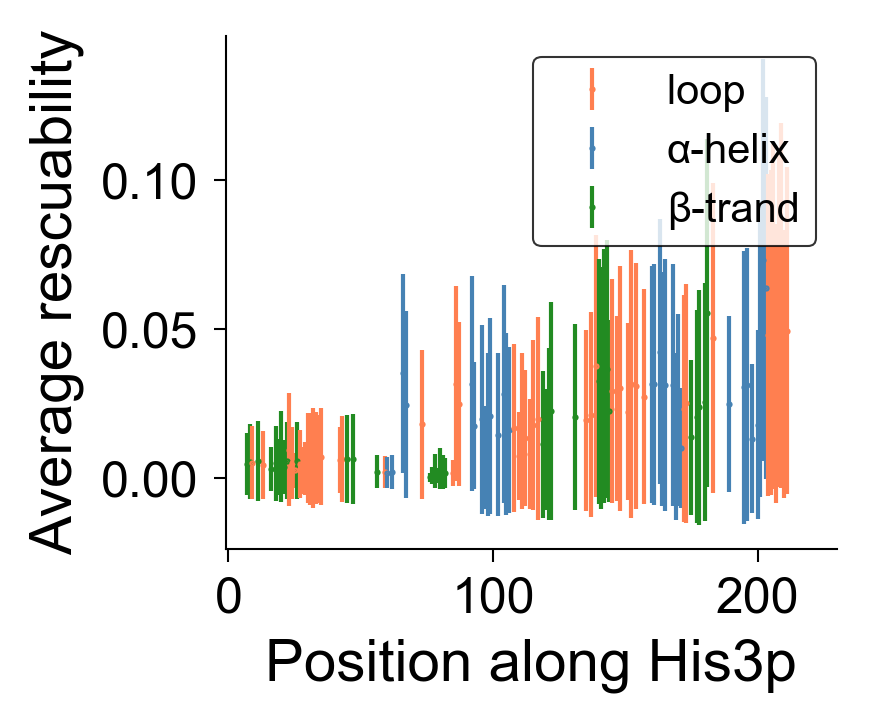

In [47]:
#unfit < wt & all_n > 10
each_site_data_dropcountzero_unfit00_alln0,All_n_cut_off = return_single_position_rescuality_site_small_wt(10)
plot_single_res(each_site_data_dropcountzero_unfit00_alln0,1,All_n_cut_off)

In [49]:
#compare the rescuability with two different calculation methods
KStest_data = pd.read_csv(readdata_dir + "RescuabilityFile/KSTest.txt",sep = "\t")
KStest_data


,aa_seq,s,dist_Scer,#genotypesWithAddiSubs,rescuability
0,NAVGAVRGVERFGSGFAPLDEALSRSVVDL,0.0,4,335,10.901930
1,EAIGAVRGVERFGSGFAPLDEALSRSVVDF,0.0,4,764,13.434017
2,NAIGAVRGIERFGSGFAPLDEALSRSVVDL,0.0,5,118,16.462332
3,NAIGAVRGVERFGSGFAPLDEALSRSVVDF,0.0,5,195,6.163740
4,NAIGAVRGVTRFGSGFAPLDEALSRSVVDF,0.0,5,222,40.015286
...,...,...,...,...,...
33063,ASINRITNETKIQNSLSID,0.0,8,12,0.000000
33064,ASINRITNETKIQDSLCIK,0.0,8,10,0.000000
33065,ASINRITNETKIQDSLSIN,0.0,8,12,0.000000
33066,ASINRITNETKIQDSLSID,0.0,8,14,0.000000


In [55]:
aa_seq_list = [ ]
rescuability_list = [ ]
for segN in [1,2,3,4,5,6,7,8,10,11,12]:
    seg_data = pd.read_csv(readdata_dir + "RescuabilityFile/rescuability_seg%d.tsv"%segN,sep="\t")
    seg_data = seg_data[(seg_data["s"] <= 0) & (seg_data["#genotypesWithAddiSubs"] >= 10)]
    aa_seq_list.extend(list(seg_data["aa_seq"].values))
    rescuability_list.extend(list(seg_data["rescuability"].values))
paperTest_data = pd.DataFrame({"aa_seq":aa_seq_list,"rescuability":rescuability_list})

In [56]:
paperTest_data 

,aa_seq,rescuability
0,NAVGAVRGVERFGSGFAPLDEALSRSVVDL,0.127229
1,EAIGAVRGVERFGSGFAPLDEALSRSVVDF,0.178624
2,NAIGAVRGIERFGSGFAPLDEALSRSVVDL,0.180260
3,NAIGAVRGVERFGSGFAPLDEALSRSVVDF,0.057911
4,NAIGAVRGVTRFGSGFAPLDEALSRSVVDF,0.439164
...,...,...
31696,ASINRITNETKIQNSLSID,0.000000
31697,ASINRITNETKIQDSLCIK,0.000000
31698,ASINRITNETKIQDSLSIN,0.000000
31699,ASINRITNETKIQDSLSID,0.000000


In [57]:
merge_data= pd.merge(KStest_data, paperTest_data,left_on=["aa_seq"],
                    right_on = ["aa_seq"])
merge_data

,aa_seq,s,dist_Scer,#genotypesWithAddiSubs,rescuability_x,rescuability_y
0,NAVGAVRGVERFGSGFAPLDEALSRSVVDL,0.0,4,335,10.901930,0.127229
1,EAIGAVRGVERFGSGFAPLDEALSRSVVDF,0.0,4,764,13.434017,0.178624
2,NAIGAVRGIERFGSGFAPLDEALSRSVVDL,0.0,5,118,16.462332,0.180260
3,NAIGAVRGVERFGSGFAPLDEALSRSVVDF,0.0,5,195,6.163740,0.057911
4,NAIGAVRGVTRFGSGFAPLDEALSRSVVDF,0.0,5,222,40.015286,0.439164
...,...,...,...,...,...,...
31696,ASINRITNETKIQNSLSID,0.0,8,12,0.000000,0.000000
31697,ASINRITNETKIQDSLCIK,0.0,8,10,0.000000,0.000000
31698,ASINRITNETKIQDSLSIN,0.0,8,12,0.000000,0.000000
31699,ASINRITNETKIQDSLSID,0.0,8,14,0.000000,0.000000


In [76]:

#merge_data = merge_data[(merge_data["rescuability_x"]>20)|(merge_data["rescuability_y"]<0.8) ]


In [68]:
import matplotlib as mpl
def reverse_colourmap(cmap, name = 'my_cmap_r'):
    """
    In: 
    cmap, name 
    Out:
    my_cmap_r

    Explanation:
    t[0] goes from 0 to 1
    row i:   x  y0  y1 -> t[0] t[1] t[2]
                   /
                  /
    row i+1: x  y0  y1 -> t[n] t[1] t[2]

    so the inverse should do the same:
    row i+1: x  y1  y0 -> 1-t[0] t[2] t[1]
                   /
                  /
    row i:   x  y1  y0 -> 1-t[n] t[2] t[1]
    """        
    reverse = []
    k = []   

    for key in cmap._segmentdata:    
        k.append(key)
        channel = cmap._segmentdata[key]
        data = []

        for t in channel:                    
            data.append((1-t[0],t[2],t[1]))            
        reverse.append(sorted(data))    

    LinearL = dict(zip(k,reverse))
    my_cmap_r = mpl.colors.LinearSegmentedColormap(name, LinearL) 
    return my_cmap_r

In [69]:
my_cmap = reverse_colourmap(mpl.cm.RdBu)
from scipy.stats import gaussian_kde

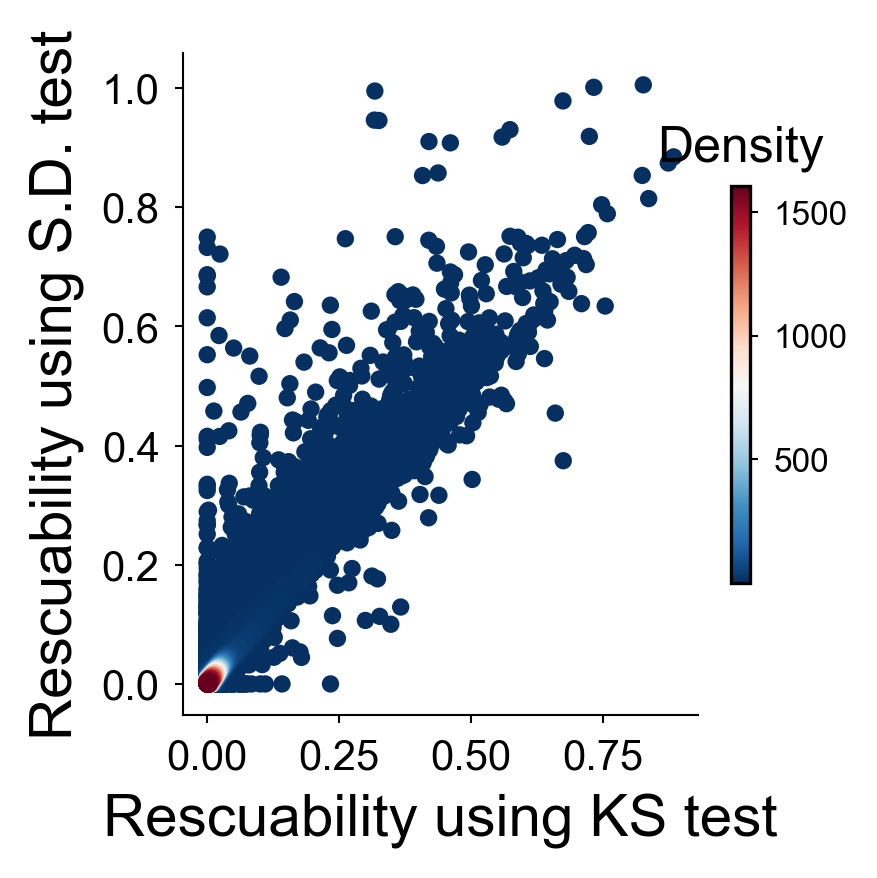

SpearmanrResult(correlation=0.8691197233945633, pvalue=0.0)

In [75]:
plt.figure(figsize=(3,3 ))
plt.rcParams["figure.dpi"] = 300
ax = plt.subplot(111)

x = merge_data["rescuability_x"].values/100
y = merge_data["rescuability_y"].values
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

# Sort the points by density, so that the densest points are plotted last
idx = z.argsort()
x, y, z = x[idx], y[idx], z[idx]


plt.scatter(x,y,c = z,s = 10,cmap=
            my_cmap)

plt.xlabel("Rescuability using KS test",fontsize=14)
plt.ylabel("Rescuability using S.D. test",fontsize=14)


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

for axis in ['bottom','left']:
    ax.spines[axis].set_linewidth(0.5)
    
#modify the lindth of the ticks
ax = plt.gca()
ax.tick_params(width=0.5)
#the length of the ticks
ax.tick_params(axis='both',length=2)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#add the colorbar
cbar =plt.colorbar(shrink=0.6)
cbar.ax.set_title('Density', fontsize=12)
cax = plt.gcf().axes[-1]
cax.tick_params(labelsize=8,length=2,width=0.5)
#save figure
plt.tight_layout()
plt.savefig(savedata_dir  + "KS_SDtestcompare.png",dpi=300)
plt.show()
stats.spearmanr(x,y)

In [77]:
stats.pearsonr(x,y)

(0.9496383400612308, 0.0)